In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [2]:
df_l = pd.read_csv("learn_evaluting_FaultInj.txt", sep=';')

In [3]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,0.081184,0.175262,0.033194,0.359765
1,0,1,0.123903,0.104631,0.039961,0.299557
2,0,2,0.160268,0.090711,0.048532,0.286568
3,0,3,0.353113,1.859824,0.029275,0.309028
4,0,4,0.210262,0.268602,0.028569,0.338367


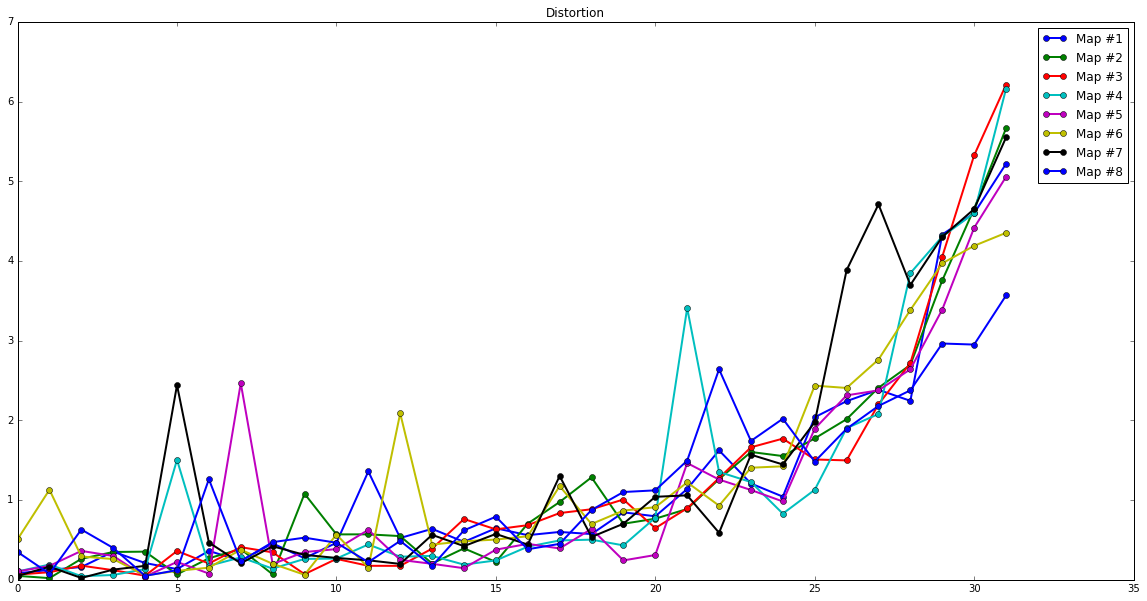

In [4]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), 
             marker='o', linewidth=2.0)
    plt.legend()

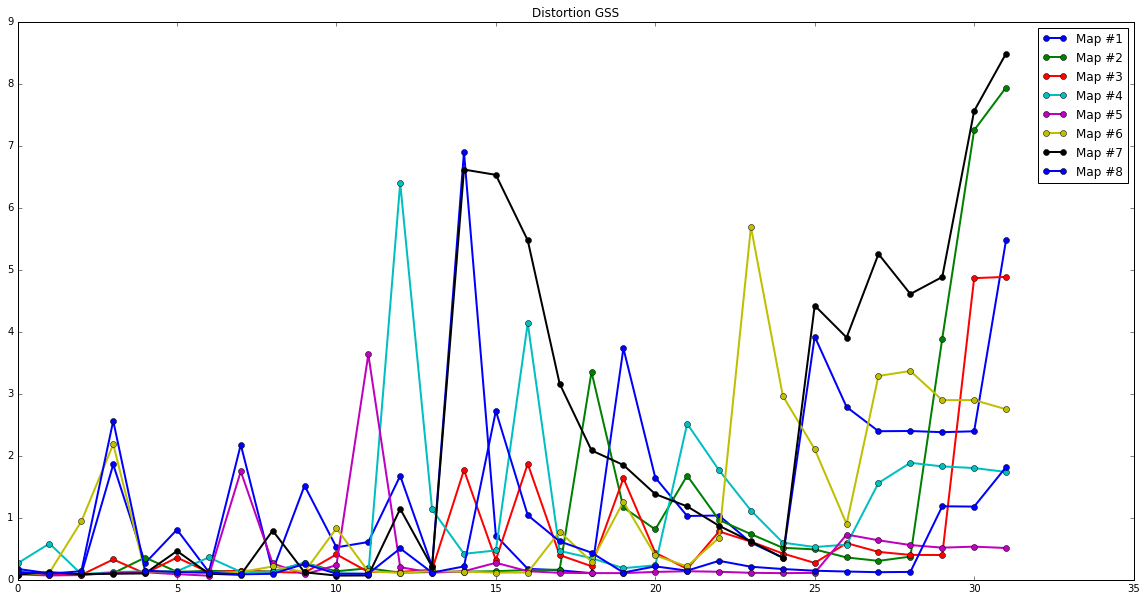

In [5]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion GSS')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion_gss'], label= 'Map #'+str(i+1), 
             marker='o', linewidth=2.0)
    plt.legend()

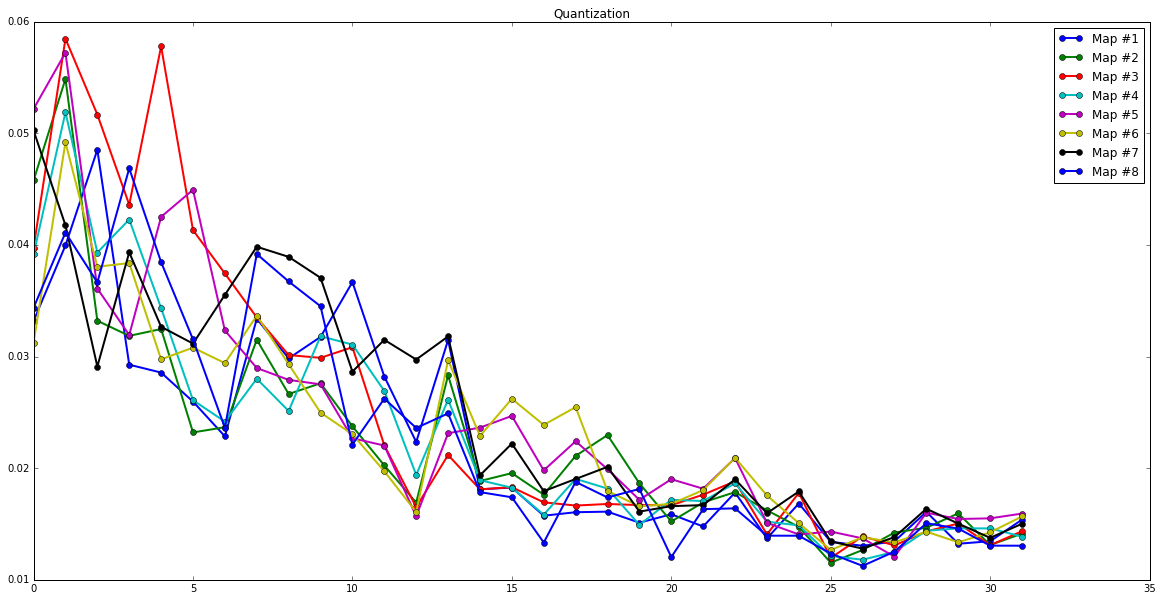

In [6]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1),
             marker='o', linewidth=2.0)
    plt.legend()

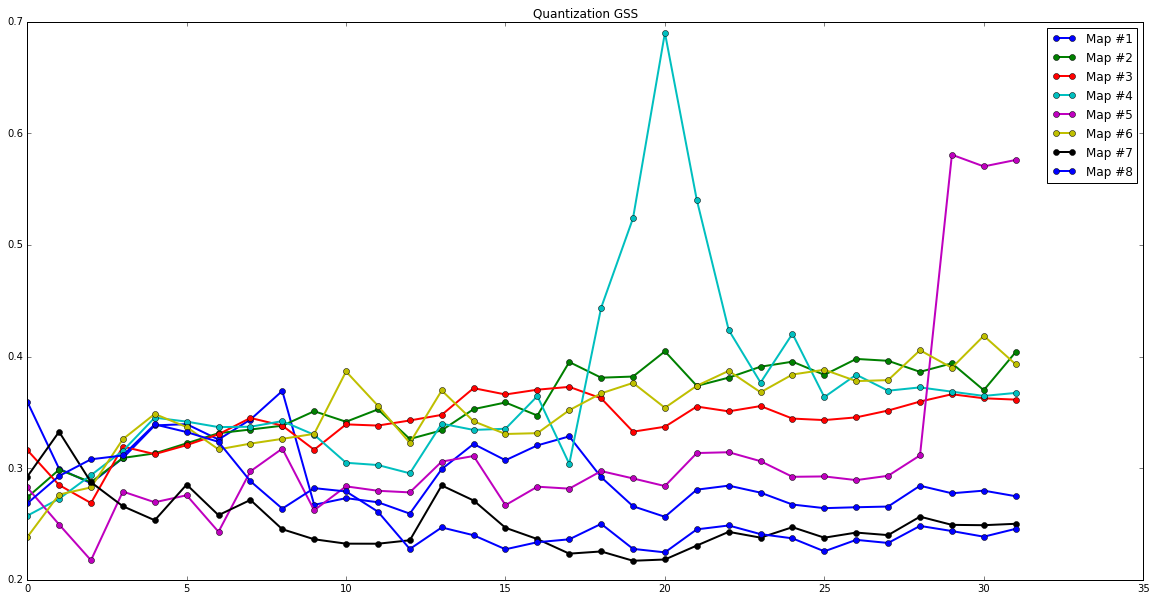

In [7]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization GSS')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization_gss'], label= 'Map #'+str(i+1), 
             marker='o', linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [8]:
df_v = pd.read_csv("valid_evaluting_FaultInj.txt", sep=';')
df_v.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,0.090367,0.185525,0.039550,0.378531
1,0,1,0.169600,0.104920,0.042250,0.298094
2,0,2,0.224881,0.099009,0.052095,0.298611
3,0,3,0.317300,1.863306,0.022333,0.328690
4,0,4,0.247825,0.268689,0.023885,0.343901


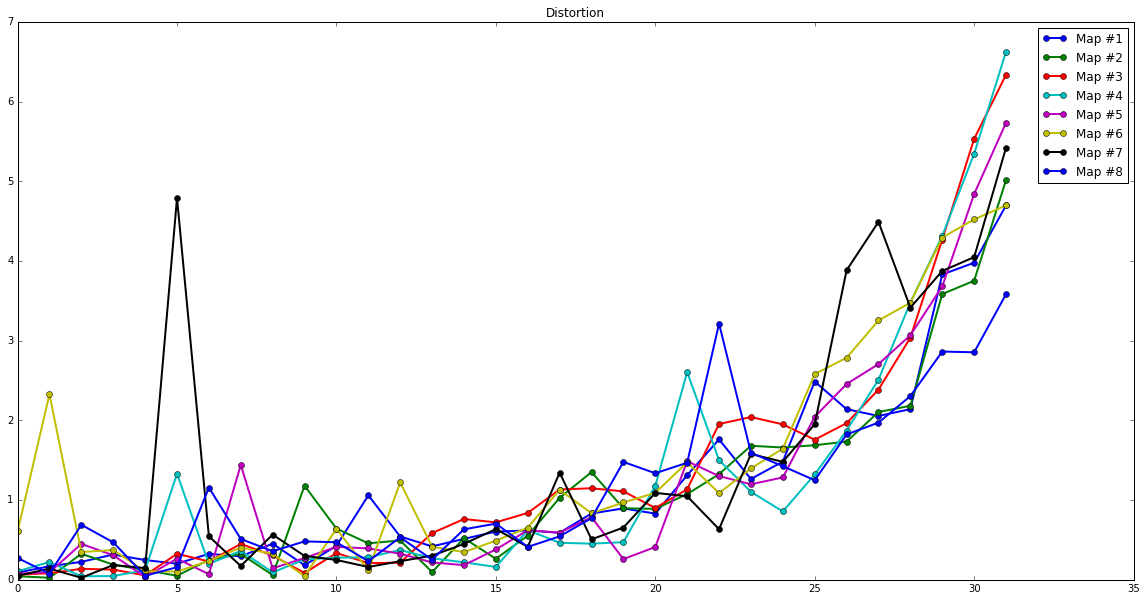

In [9]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

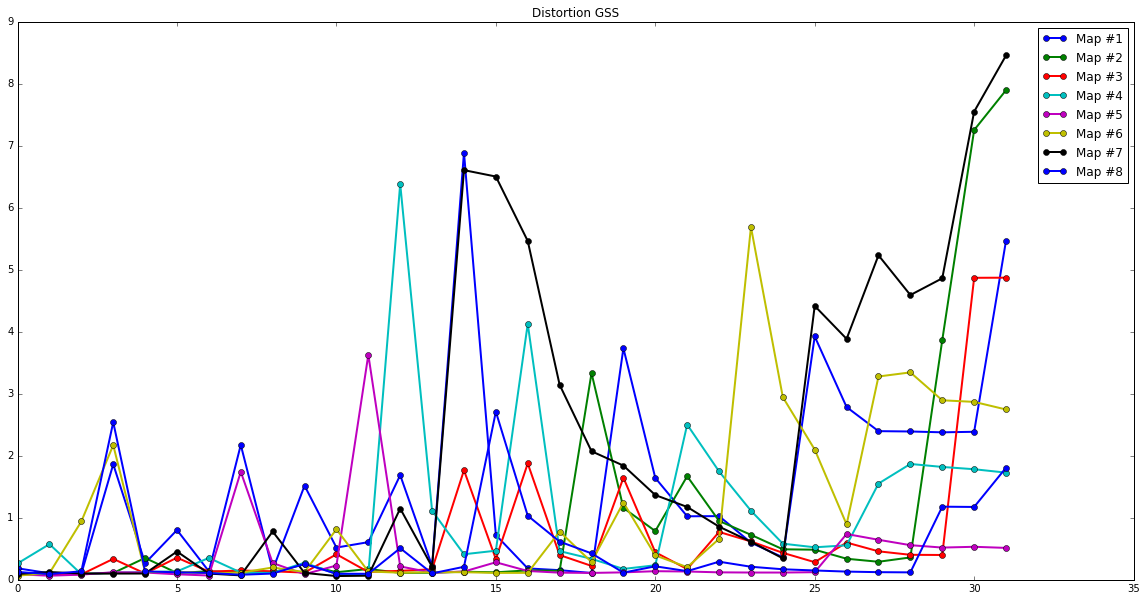

In [10]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion GSS')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion_gss'], label= 'Map #'+str(i+1), 
             marker='o', linewidth=2.0)
    plt.legend()

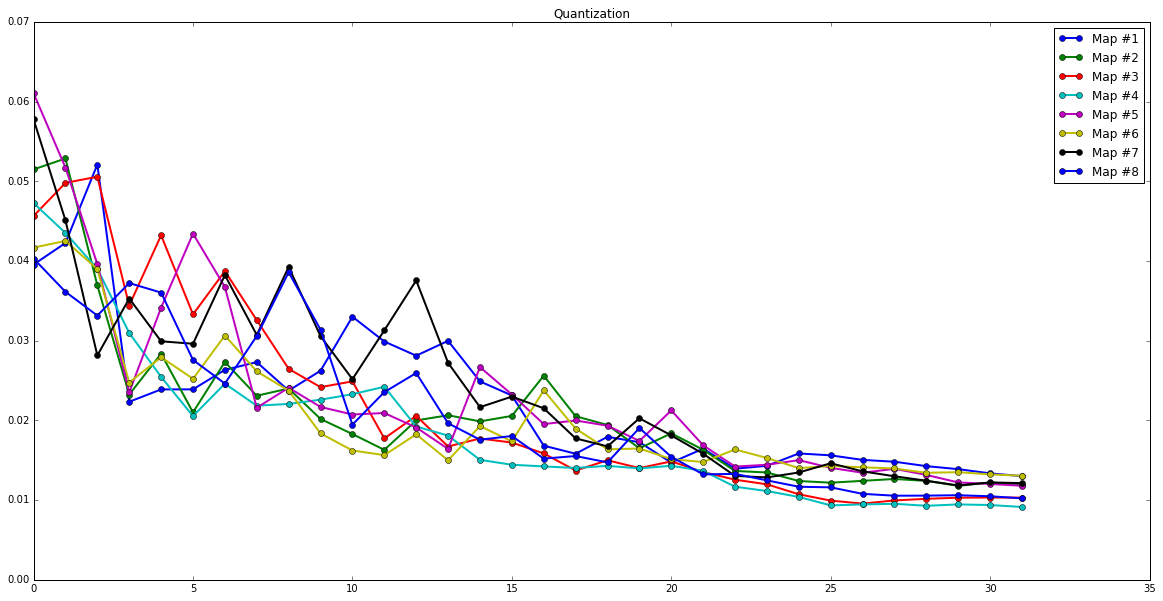

In [11]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), 
             marker='o',
            linewidth=2.0)
    plt.legend()

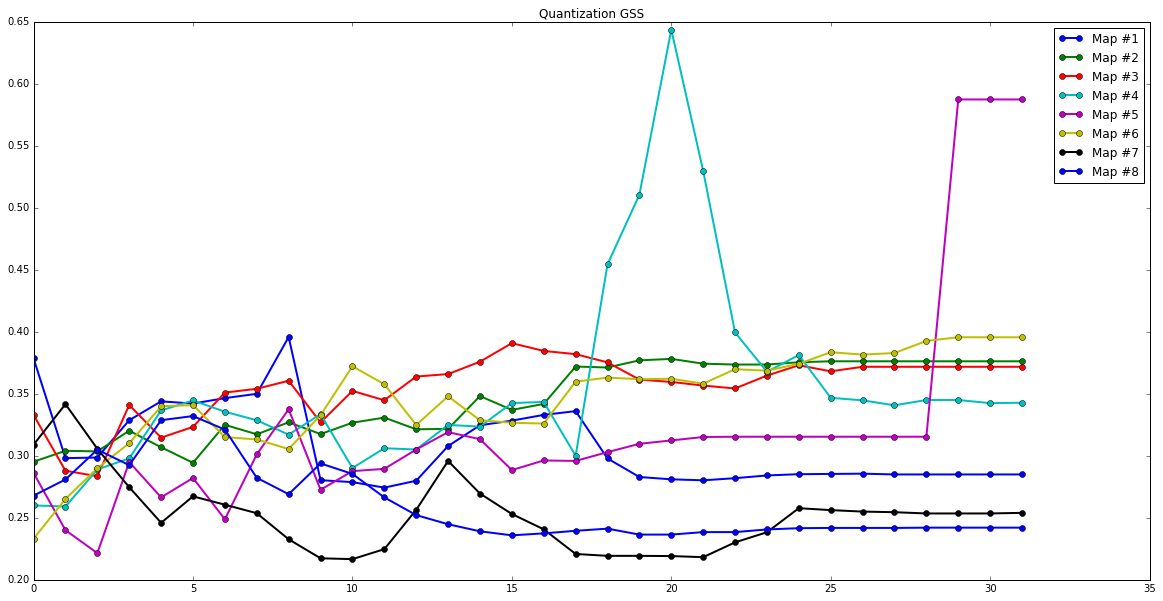

In [12]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization GSS')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization_gss'], label= 'Map #'+str(i+1), 
             marker='o',
            linewidth=2.0)
    plt.legend()

In [13]:
df_s = pd.read_csv("statistics_FaultInj.txt", sep=';')
df_s

,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
0,0,0.016774,0.366485,0.016774,0.366485,5.261582,4.210791,5.261582,4.210791,0.000998,0.095469,0.000998,0.095469,0.942308,2.789742,0.942308,2.789742
1,1,0.016774,0.366485,0.015062,0.380350,5.261582,4.210791,33.560946,36.371675,0.000998,0.095469,0.001127,0.105259,0.942308,2.789742,4.691590,23.296404
2,2,0.016774,0.366485,0.014578,0.371154,5.261582,4.210791,61.977058,61.725890,0.000998,0.095469,0.001029,0.105078,0.942308,2.789742,5.948833,28.944799
3,3,0.016774,0.366485,0.014580,0.383097,5.261582,4.210791,92.505620,86.455919,0.000998,0.095469,0.000977,0.114955,0.942308,2.789742,8.217037,32.894169
4,4,0.016774,0.366485,0.014879,0.380802,5.261582,4.210791,122.717763,122.433381,0.000998,0.095469,0.001054,0.103812,0.942308,2.789742,8.301196,44.426502
5,5,0.016774,0.366485,0.015389,0.393169,5.261582,4.210791,156.206224,149.584507,0.000998,0.095469,0.001005,0.118192,0.942308,2.789742,10.167812,40.919418
6,6,0.016774,0.366485,0.016002,0.387726,5.261582,4.210791,188.390385,183.110880,0.000998,0.095469,0.001040,0.119677,0.942308,2.789742,10.966855,52.159103
7,7,0.016774,0.366485,0.016875,0.392903,5.261582,4.210791,222.471398,216.193525,0.000998,0.095469,0.001025,0.110663,0.942308,2.789742,12.980091,58.030521
8,8,0.016774,0.366485,0.017681,0.404109,5.261582,4.210791,257.217536,251.861083,0.000998,0.095469,0.001084,0.124974,0.942308,2.789742,12.885109,61.257000
9,9,0.016774,0.366485,0.018726,0.397456,5.261582,4.210791,293.648095,287.036952,0.000998,0.095469,0.001218,0.116328,0.942308,2.789742,14.677397,67.419197


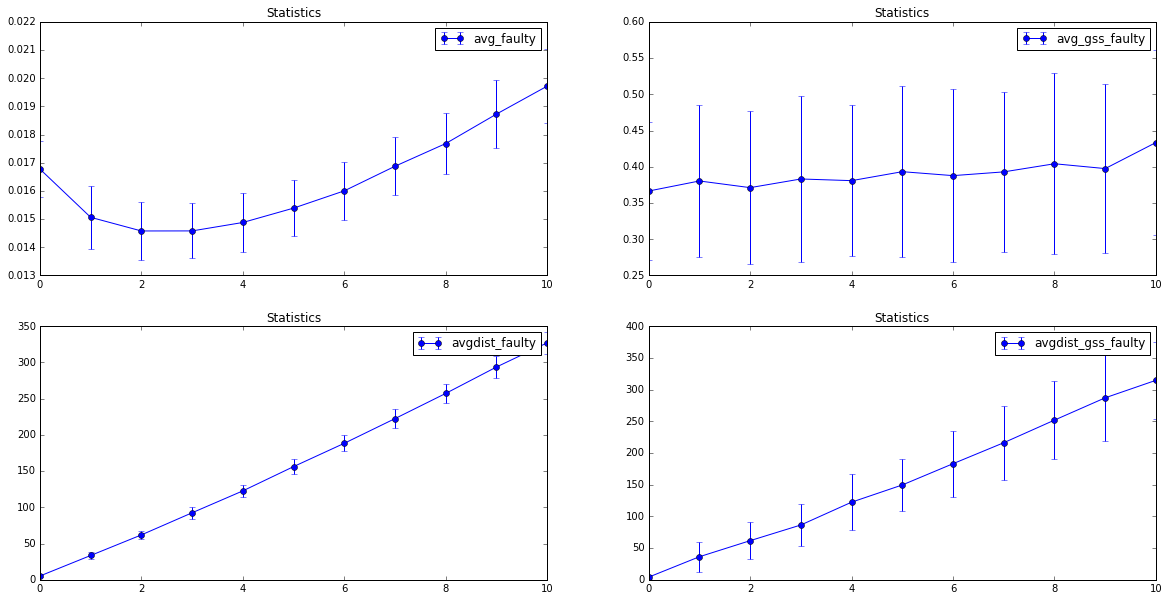

In [14]:
avg = df_s.filter(regex=".*_faulty").filter(regex="avg.*")
clm_num = len(avg.columns)
avg = avg.__iter__()
stddev = df_s.filter(regex=".*_faulty").filter(regex="stddev.*").__iter__()

width = 20
height = 10
plt.figure(figsize=(width, height))

for i in range(0,clm_num):
    plt.subplot(clm_num/2,2,i+1)
    plt.title('Statistics')
    plt.errorbar(range(0,len(df_s)), df_s[avg.__next__()], yerr=df_s[stddev.__next__()], fmt='-o')
    plt.legend()